In [1]:
%matplotlib inline
import pandas as pd
from covidb.pull import data_pull_csv
from covidb.process import get_todays_data
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# print("Starting Pull")
# data_pull_csv()
# print("Finished Pull")
print("Started Processing")
data_dict = get_todays_data()
print("Finished Processing")

Started Processing
Finished Processing


In [3]:
df = data_dict["all_data"]
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths', 'is_full_state', 'county', 'state',
       'county_fips', 'state_fips', 'state_code'],
      dtype='object')

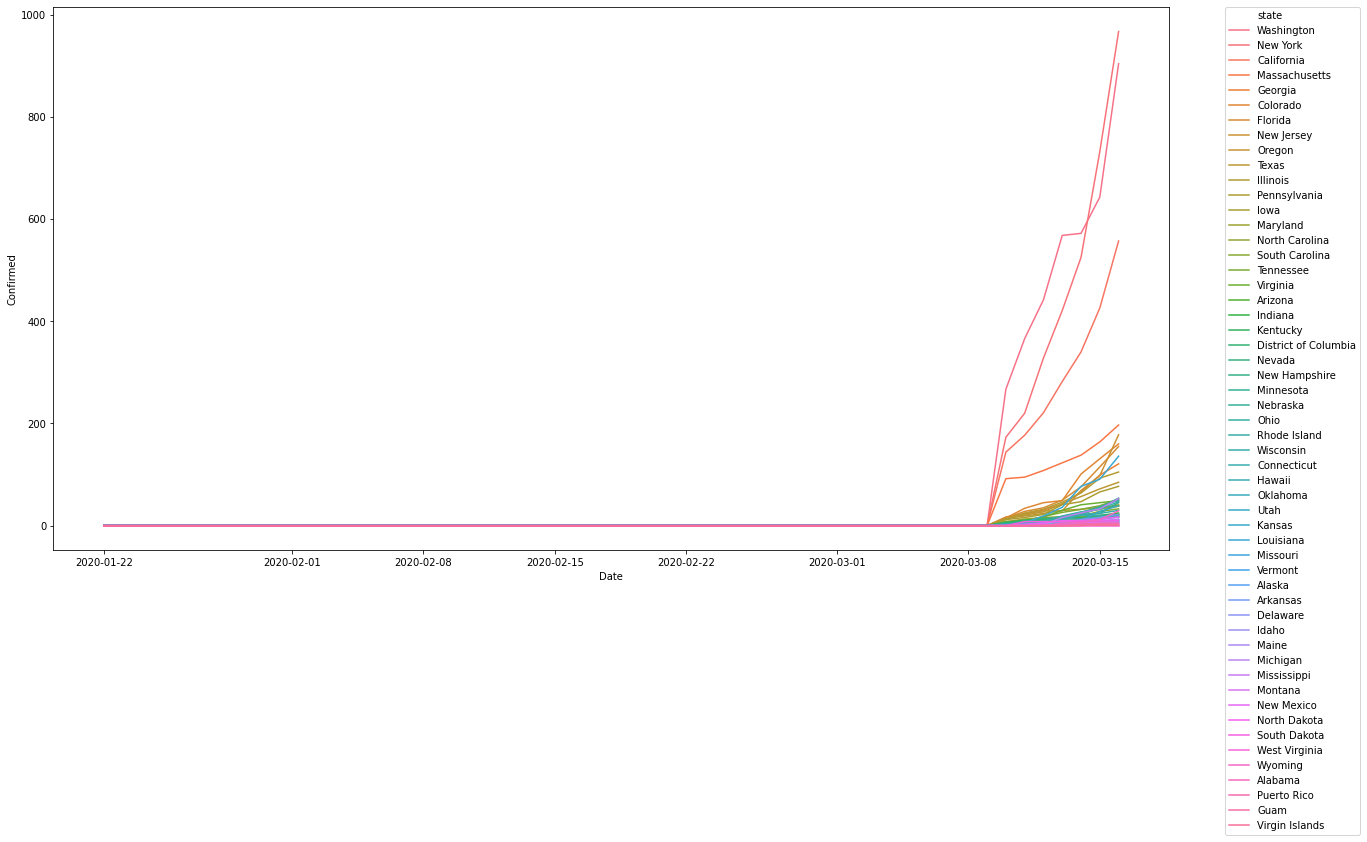

In [6]:
covid_states_df = df.loc[df["is_full_state"] == True]
# States DF
covid_states_df = covid_states_df.loc[
    (pd.isna(covid_states_df["county"])) & \
    pd.notna(covid_states_df["state"])
].reset_index(drop=True)

sns.lineplot(x="Date", y="Confirmed", hue="state", data=covid_states_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

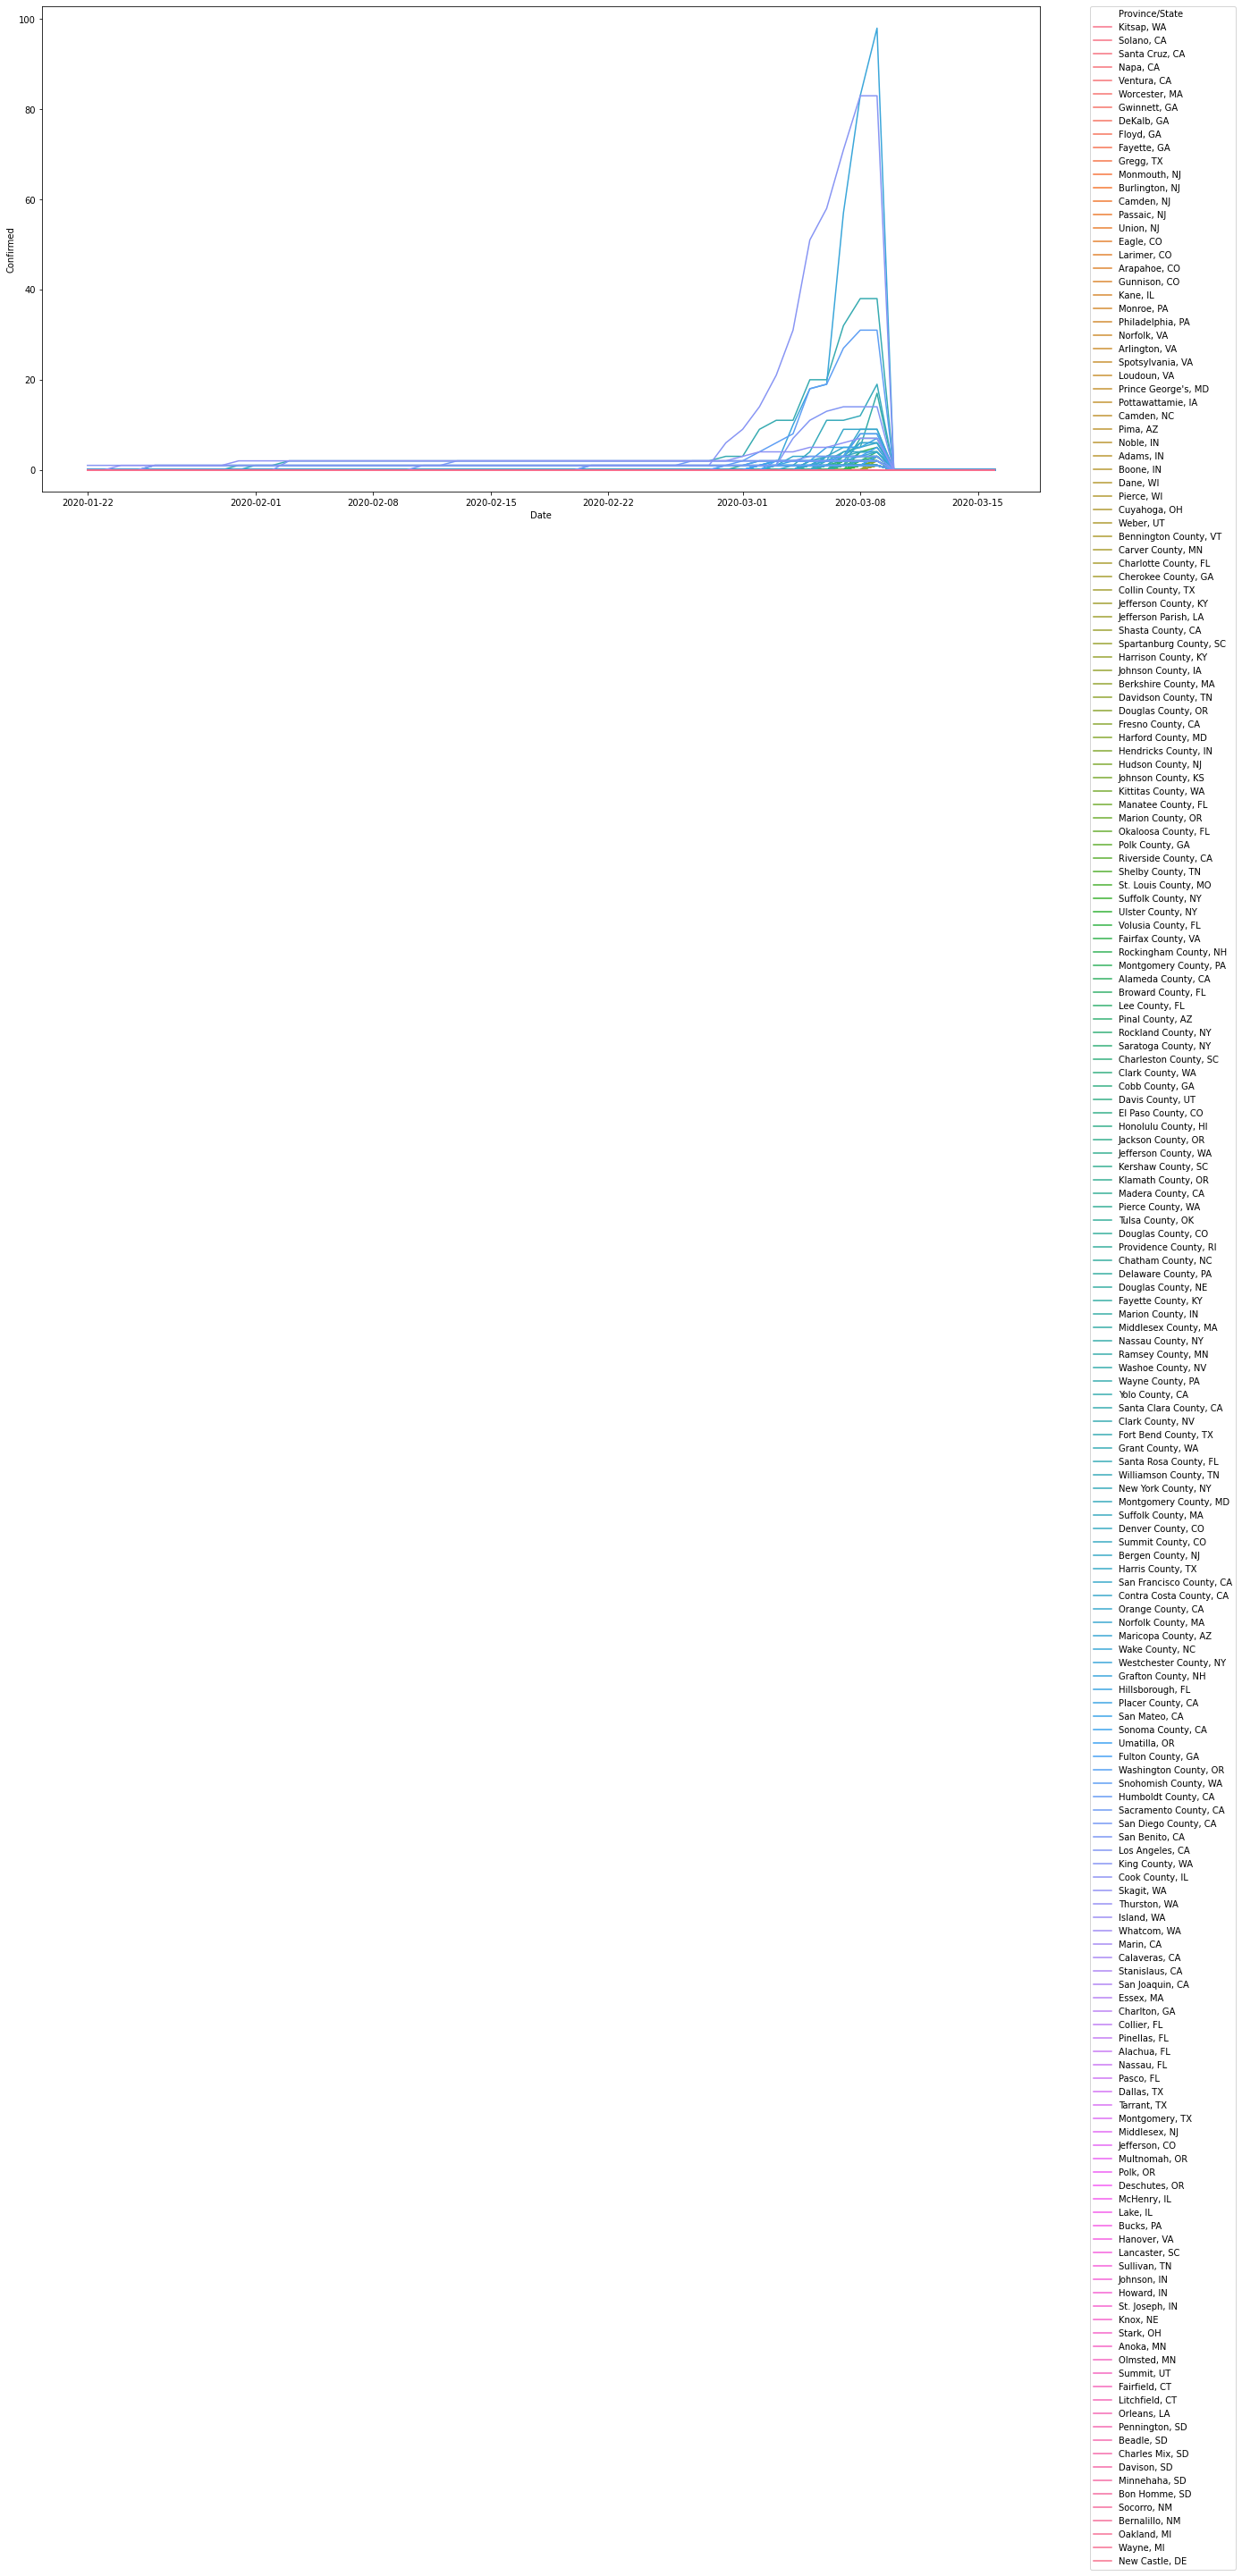

In [7]:
covid_counties_df = df.loc[df["is_full_state"] == False]
# Counties Df
covid_counties_df = covid_counties_df.loc[
    (pd.notna(covid_counties_df["county"])) & \
    (pd.notna(covid_counties_df["state"]))
].reset_index(drop=True)


sns.lineplot(x="Date", y="Confirmed", hue="Province/State", data=covid_counties_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [8]:
import datetime
import plotly.figure_factory as ff
covid_counties_df_map = covid_counties_df.loc[
    (covid_counties_df.Confirmed > 0) & \
    (covid_counties_df.Date == datetime.date(year=2020, month=3, day=9)) & \
    (pd.notna(covid_counties_df.county_fips))
]
fig = ff.create_choropleth(fips=covid_counties_df_map["county_fips"], values=covid_counties_df_map["Confirmed"])
fig.layout.template = None
fig.show()

In [9]:
import datetime
import plotly.express as px
covid_states_df_map = covid_states_df.loc[
    (covid_states_df.Confirmed > 0) & \
    (covid_states_df.Date == covid_states_df.Date.max())
]
fig = px.choropleth(
    locations=covid_states_df["state_code"],
    locationmode="USA-states", 
    color=covid_states_df["Confirmed"], 
    scope="usa"
)

fig.layout.template = None
fig.show()